**Contexto:**

Trabalhamos para uma consultoria de IA que deseja uma IA Generativa para gerar imagens de roupas.

Iremos utilizar o dataset Fashion MNIST que já está presente na biblioteca.

In [ ]:
import tensorflow as tf
from keras import layers
from keras.api.models import Sequential
import matplotlib.pyplot as plt

2025-08-13 22:39:13.611039: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755135553.704803    7247 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755135553.729561    7247 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755135553.923084    7247 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755135553.923136    7247 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755135553.923138    7247 computation_placer.cc:177] computation placer alr

#### Carregando e normalizando o dataset

In [4]:
(train_images, train_labels), _ = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

**Normalizando as imagens entre -1 e 1**

Essa normalização dos pixels das imagens é necessária pois a função de ativação que será usada no modelo gerador normalmente trabalha com esse intervalo de valores. Isso melhora a performance da rede neural.

In [6]:
train_images = (train_images - 127.5) / 127.5

**Separando os dados em lotes (batches)**

In [7]:
BATCH_SIZE = 256
train_ds = tf.data.Dataset.from_tensor_slices(train_images).shuffle(train_images.shape[0]).batch(BATCH_SIZE)

I0000 00:00:1755136022.978165    7247 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6102 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


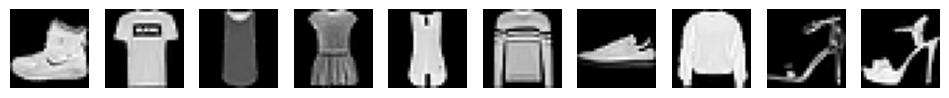

In [10]:
plt.figure(figsize=(12,6))

imgs_to_show = 10
for i in range(imgs_to_show):
    plt.subplot(1, imgs_to_show, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')

#### Estruturando o Gerador

In [ ]:
def gerador():
    model = Sequential()
    
    model.add(layers.Input(shape=100,))
    model.add(layers.Dense(7*7*256, use_bias=False))